# Results for prob4

In [1]:
import json
import os
import matplotlib.pyplot as plt
from openqaoa.algorithms import QAOAResult
import numpy as np

## Upload json files

In [2]:
dir_routes = ['./noiseless','./noisy','./zne']

results = []

for dir_itr,dir_route in enumerate(dir_routes):
    results.append({})
    for file_name in os.listdir(dir_route):
        if file_name.endswith(".json"):
            file_route = os.path.join(dir_route,file_name)
            with open(file_route, "r") as file:
                result = json.load(file)
                result = QAOAResult.from_dict(result)
                results[dir_itr][file_name[0:-5]] = result

The structure is a list of 3 dictionaries. The dictionaries reference to the directory noiseless,noisy and zne in the mentioned order. Each dictionary has the files of each directory, which are JSON files and each JSON corresponds to a QAOA execution.

In [3]:
display(results[0],'\n')
display(results[1],'\n')
display(results[2],'\n')

{'prob4_p6-standard-ramp-x-Powell_noiseless': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x245b8dbd4e0>}

'\n'

{'prob4_p6-standard-ramp-x-Powell_noisy': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x245b8d77910>}

'\n'

{'prob4_p6-standard-ramp-x-Powell_zne_conf0_fold_gates_from_left': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x245b8dbdea0>,
 'prob4_p6-standard-ramp-x-Powell_zne_conf0_fold_gates_from_right': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x245b8dbd060>,
 'prob4_p6-standard-ramp-x-Powell_zne_conf1_fold_gates_from_left': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x245b8dbcf10>,
 'prob4_p6-standard-ramp-x-Powell_zne_conf1_fold_gates_from_right': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x245b8dbeaa0>,
 'prob4_p6-standard-ramp-x-Powell_zne_conf2_fold_gates_from_left': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x245b8dbd630>,
 'prob4_p6-standard-ramp-x-Powell_zne_conf2_fold_gates_from_right': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x245b8dbd840>,
 'prob4_p6-standard-ramp-x-Powell_zne_conf3_fold_gates_from_left': <openqaoa.algorithms.qaoa.qaoa_result.QAOAResult at 0x245b8dbd5d0>,
 'prob4_p6-standard-ramp-x-Powell_zne_conf3_fold_gat

'\n'

In [4]:
noiseless_key = list(results[0].keys())[0]
noisy_key = list(results[1].keys())[0]
zne_keys = list(results[2].keys())

## Cost comparison

The regular cost history provided by OpenQAOA. For each ZNE execution, there is a plot that shows:
1. The noiseless cost history, for each function evaluation.
2. The noisy cost history, for each function evaluation.
3. The corresponding ZNE cost history, for each function evaluation.

The images are saved at imgs/cost_comparison.

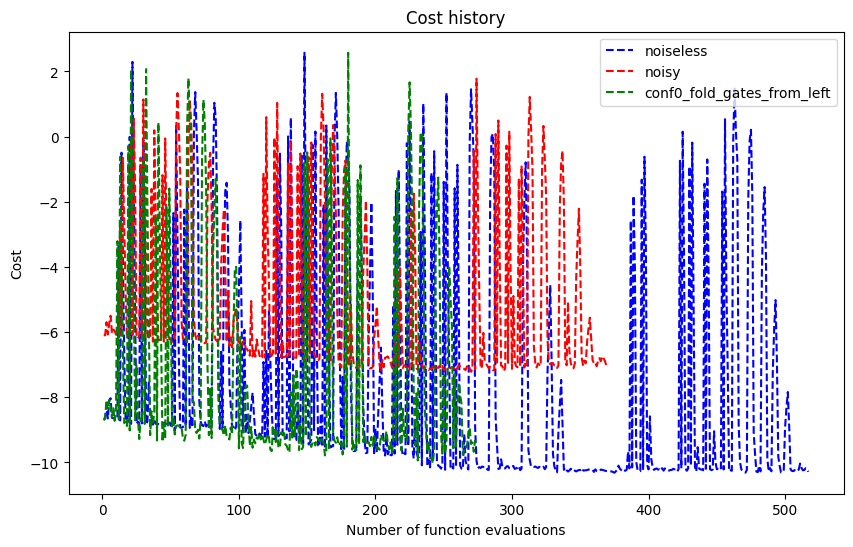

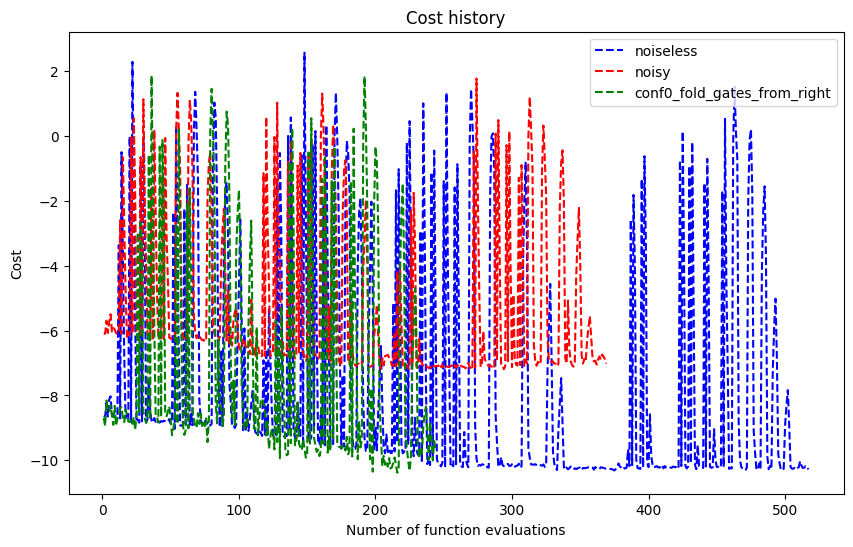

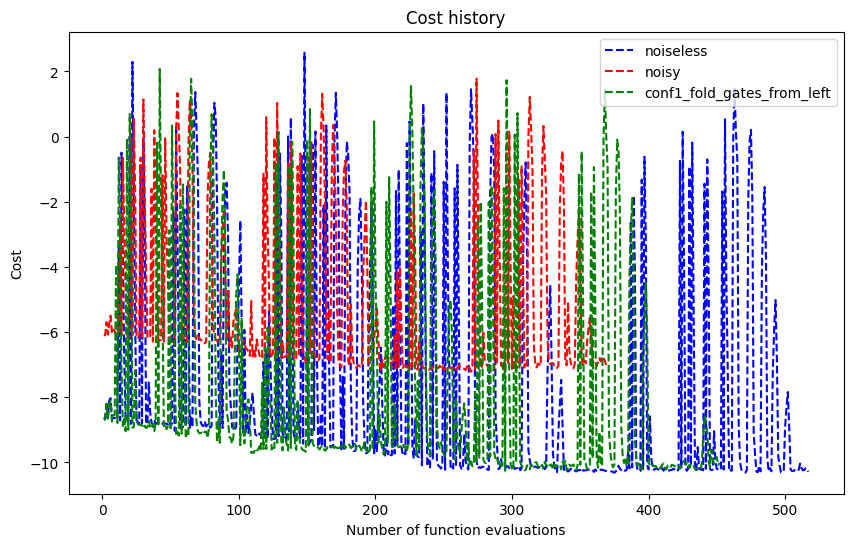

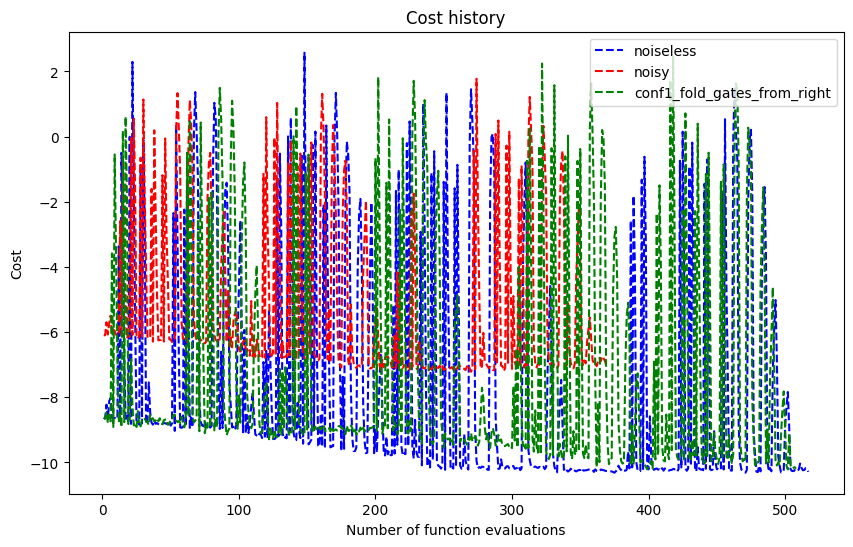

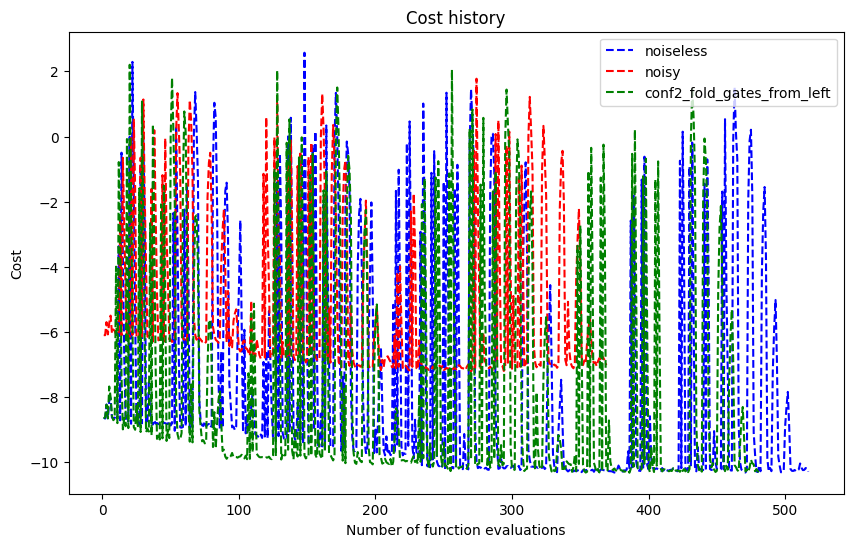

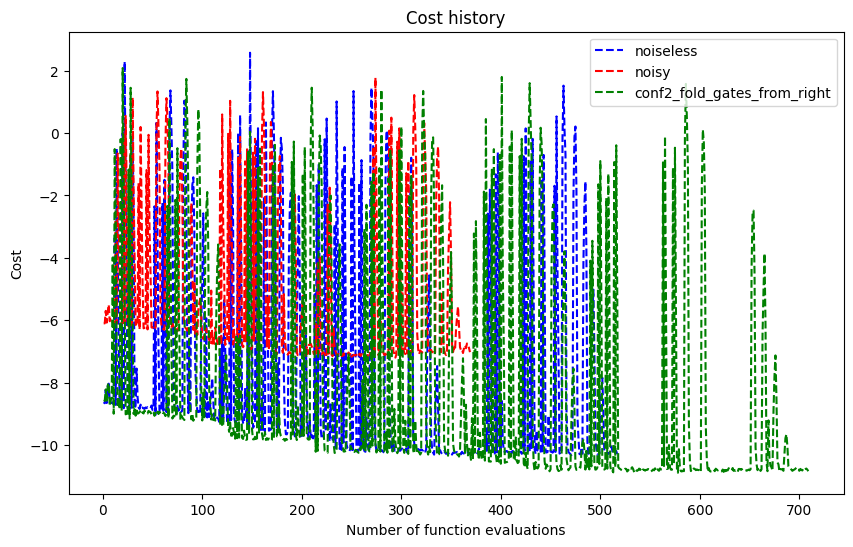

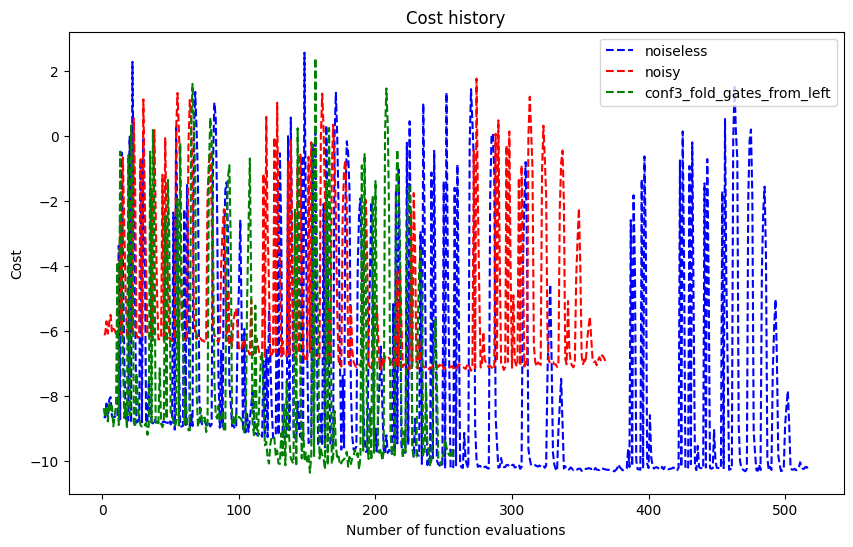

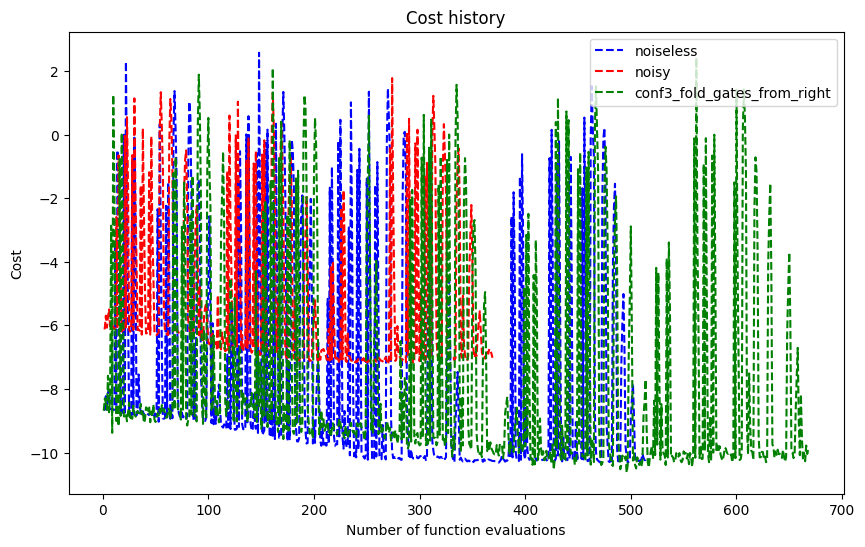

In [5]:
for zne_key in zne_keys:   
    zne_label = zne_key[zne_key.find("conf"):]
    fig, ax = plt.subplots(figsize=(10,6))
    results[0][noiseless_key].plot_cost(figsize=(7,4),color='blue',label='noiseless',ax=ax)
    results[1][noisy_key].plot_cost(figsize=(7,4),color='red',label='noisy',ax=ax)
    results[2][zne_key].plot_cost(figsize=(7,4),color='green',label=zne_label,ax=ax)
    plt.savefig("./imgs/cost_comparison/prob4_costComparison_%s.png" % (str(zne_label)))

## Relative error to each noiseless cost

For the noisy execution cost history, a relative error to each noiseless cost in the noiseless execution cost history will be calculated. That means, for function evaluation (fev) number $i$, a relative error of the noisy cost at fev $i$ with respect the noiseless cost at fev $i$ will be calculated. That it is:

$relError(noisyCost_i,noiselessCost_i) = \tfrac{|noisyCost_i - noiselessCost_i|}{noiselessCost_i}$ for each fev $i$.

The same metric will be calculated for each ZNE execution, and a final image will be plot which will show:
1. The relative error of the noisy costs with respect their corresponding noiseless costs.
2. The relative error of the corresponding ZNE costs with respect their corresponding noiseless cost.

It is important to notice that, in this case, $\textbf{a lower relative error in a fev $i$ doesn't means a better approximation to the optimal noiseless cost}$. This relation will be better explain with the metric calculated in following section.

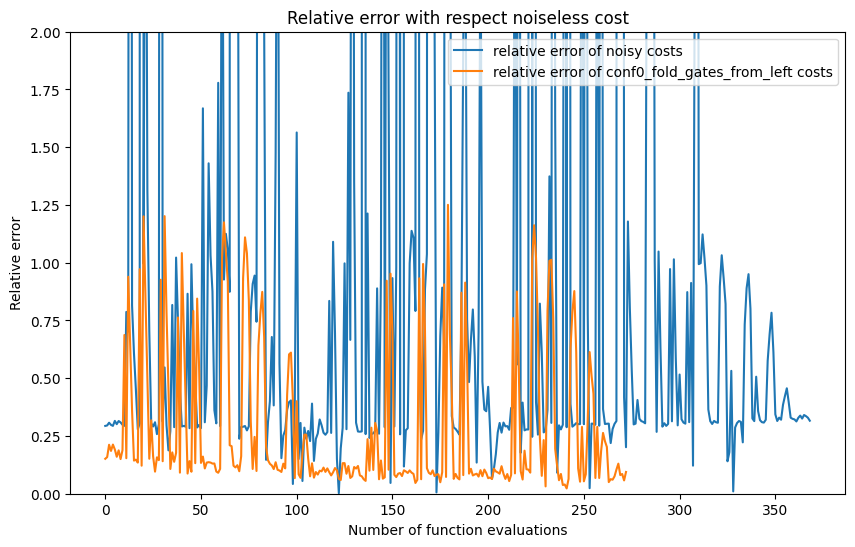

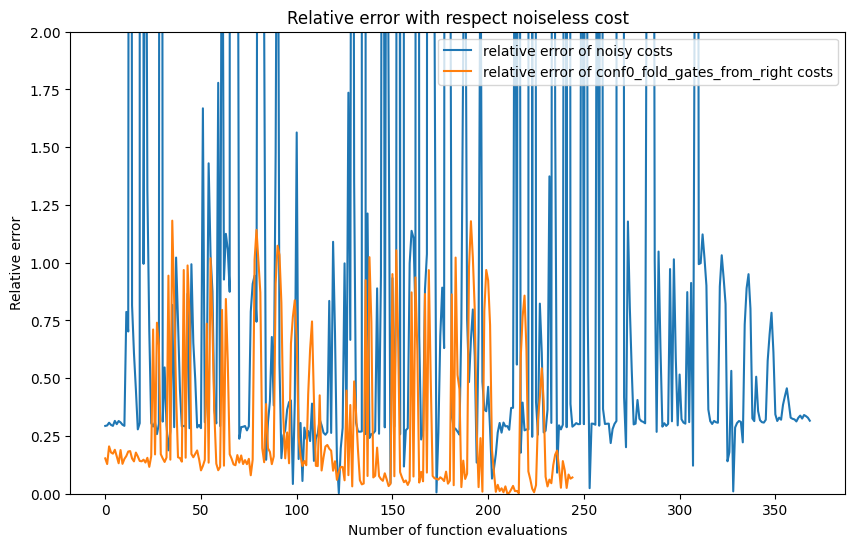

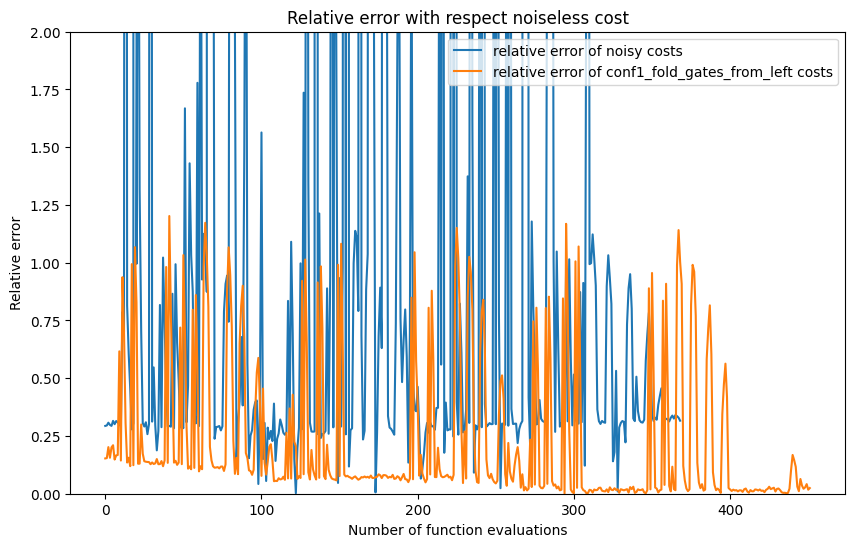

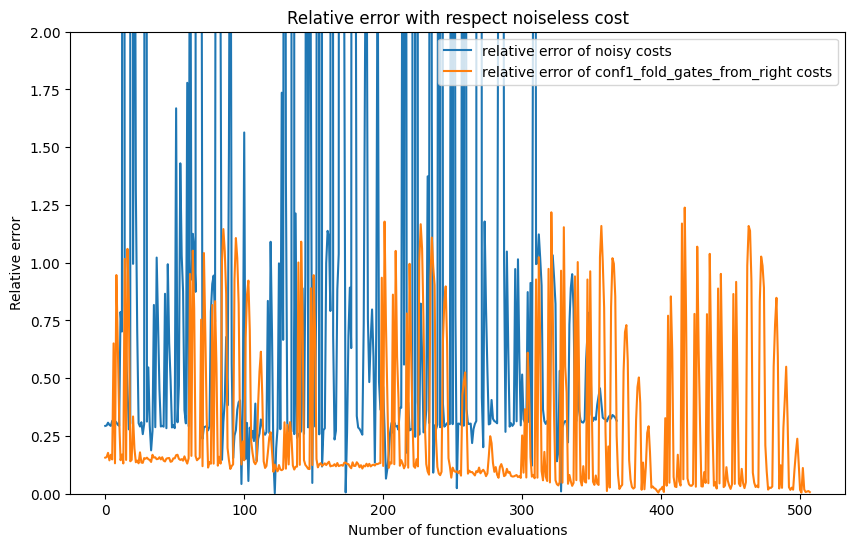

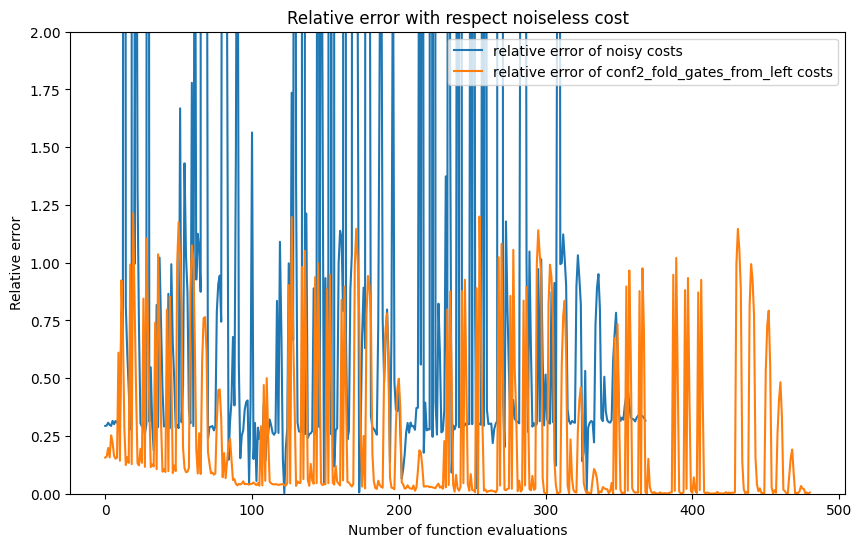

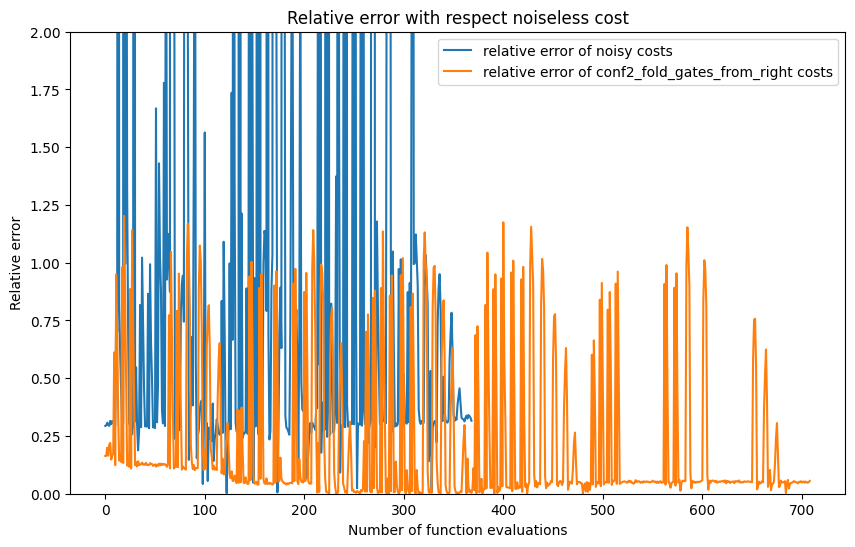

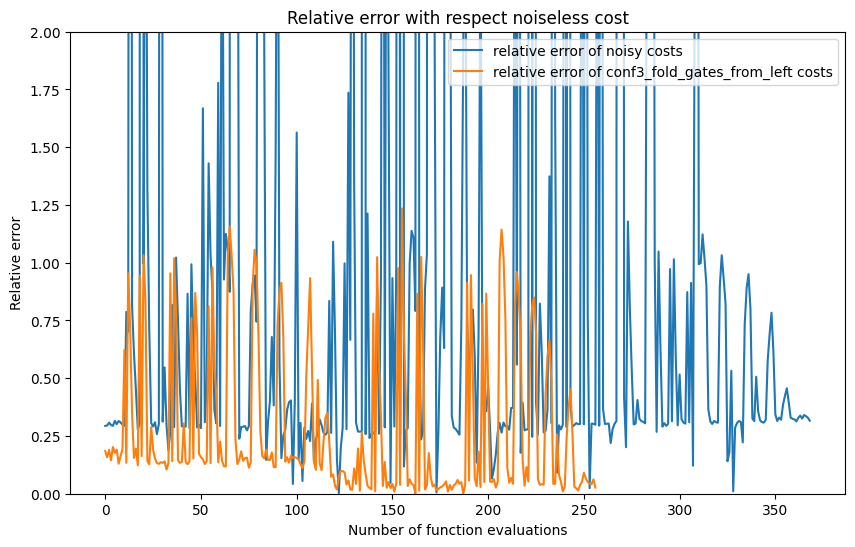

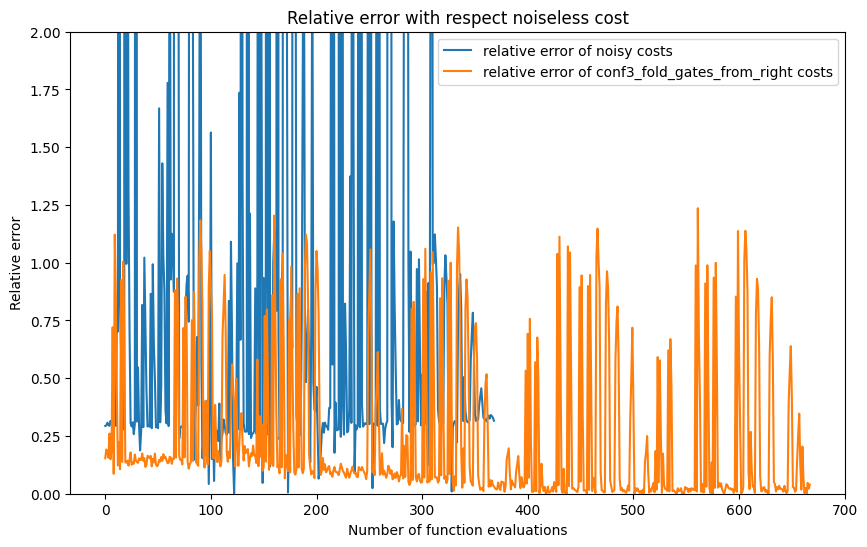

In [5]:
noisy_relative_errors = []
zne_relative_errors = {}

#calculate the relative errors between the noisy costs and the noiseless costs
for noisy_itr,noisy_cost in enumerate(results[1][noisy_key].intermediate['cost']):
    try:
        noiseless_cost = results[0][noiseless_key].intermediate['cost'][noisy_itr]
    except:
        break
    rel_err = abs(noisy_cost - noiseless_cost) / abs(noiseless_cost)
    noisy_relative_errors.append(rel_err)

#calculate the relative errors between the zne costs and the noiseless costs
for zne_key_itr,zne_key in enumerate(zne_keys):
    zne_relative_errors[zne_key] = []
    for zne_cost_itr,zne_cost in enumerate(results[2][zne_key].intermediate['cost']):
        try:
            noiseless_cost = results[0][noiseless_key].intermediate['cost'][noisy_itr]
        except:
            break
        rel_err = abs(zne_cost - noiseless_cost) / abs(noiseless_cost)
        zne_relative_errors[zne_key].append(rel_err)

#draw the plots
noisy_X = range(len(noisy_relative_errors))
for zne_key in zne_keys:
    zne_label = zne_key[zne_key.find("conf"):]
    zne_X = range(len(zne_relative_errors[zne_key]))
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(noisy_X, noisy_relative_errors, label='relative error of noisy costs')
    ax.plot(zne_X, zne_relative_errors[zne_key], label='relative error of '+zne_label+' costs')

    plt.ylim(0,2)
    plt.xlabel('Number of function evaluations')
    plt.ylabel('Relative error')
    plt.title('Relative error with respect noiseless cost')
    plt.legend()
    plt.savefig("./imgs/relative_errors_comparison/each_noiseless_cost/prob4_relativeErrorsComparison_%s.png" % (str(zne_label)))

## Relative error to the optimal noiseless cost

We will define the optimal noiseless cost as the lowest cost achieved in the noiseless execution. That means that, for a single QAOA noiseless execution of $n$ fevs, there will only be one optimal noiseless cost (the lower one, in this case).

Given the previous definition, lets define the metric we will calculate in this section. For the noisy execution cost history, a relative error to the optimal noiseless cost in the noiseless execution cost history will be calculated. That means, for fev number $i$, a relative error of the noisy cost at fev $i$ with respect the optimal noiseless cost(remeber it is just a single value) will be calculated. That it is:

$relError(noisyCost_i,optimalNoiselessCost) = \tfrac{|noisyCost_i - optimalNoiselessCost|}{optimalNoiselessCost}$ for each fev $i$.

The same metric will be calculated for each ZNE execution, and a final image will be plot which will show:
1. The relative error of the noisy costs with respect the optimal noiseless costs.
2. The relative error of the corresponding ZNE costs with respect the optimal noiseless cost.

A lower relative error in a fev $i$ could show a better approximation to the optimal cost that a QAOA would find in a noiseless envirioment.

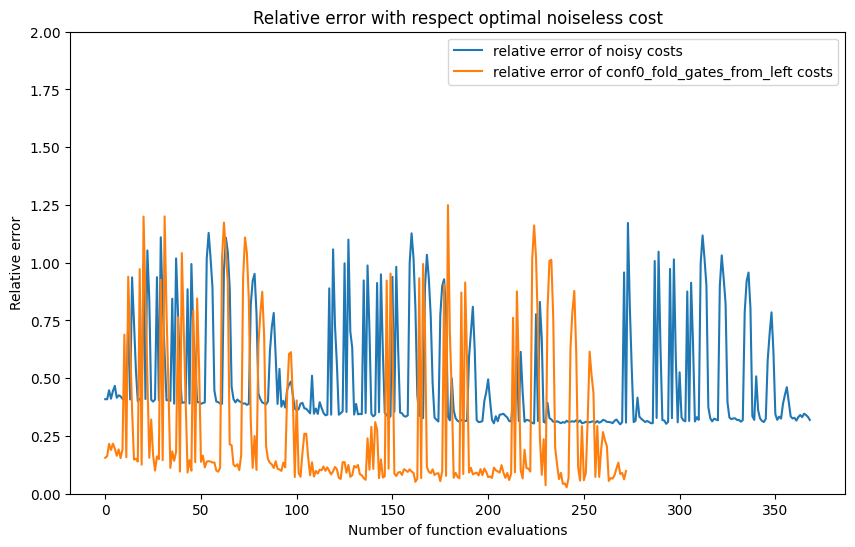

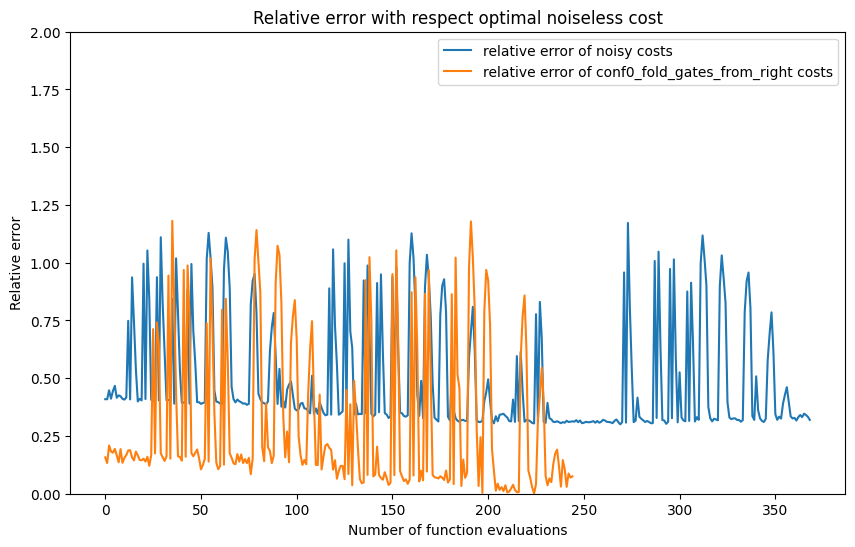

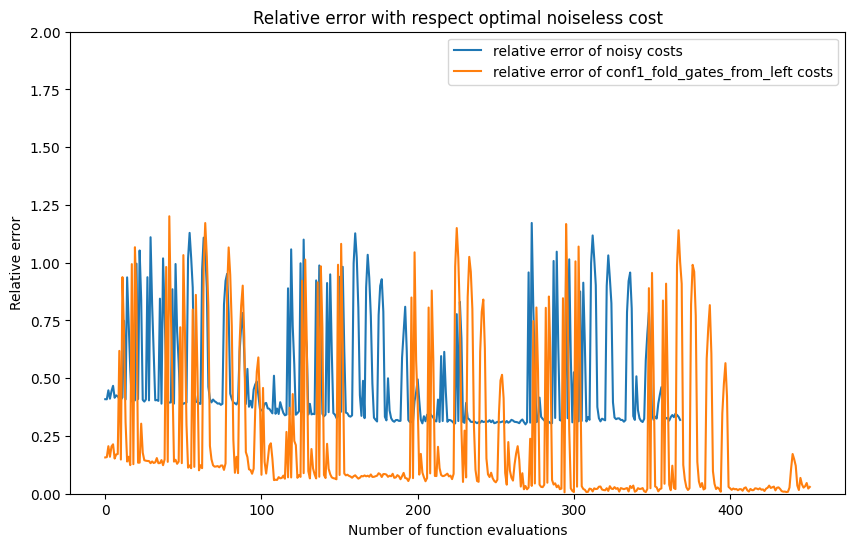

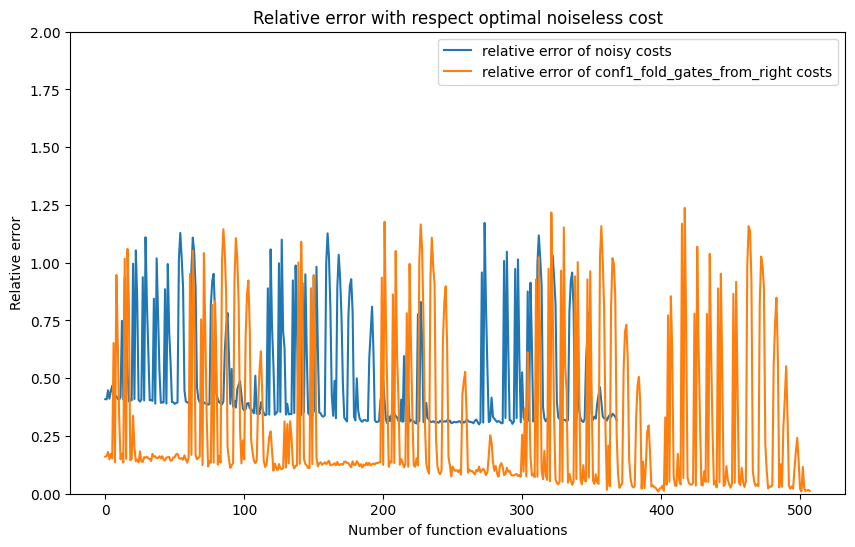

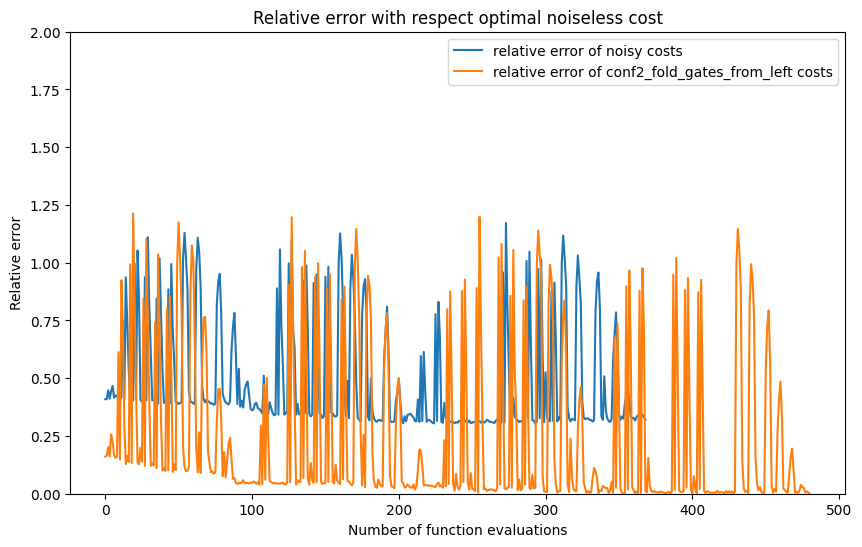

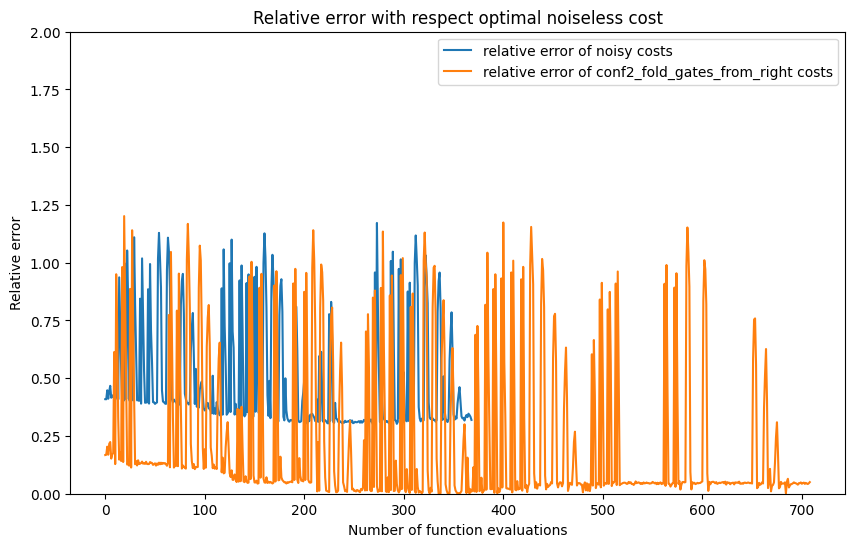

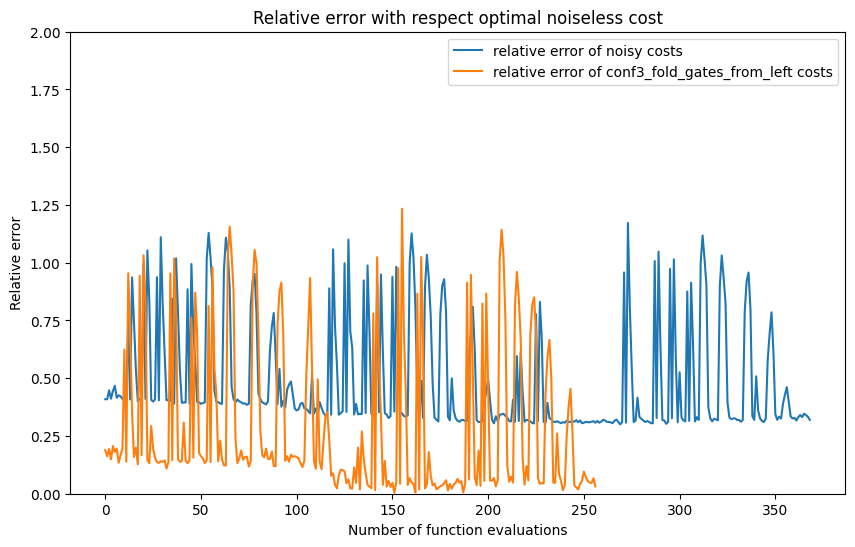

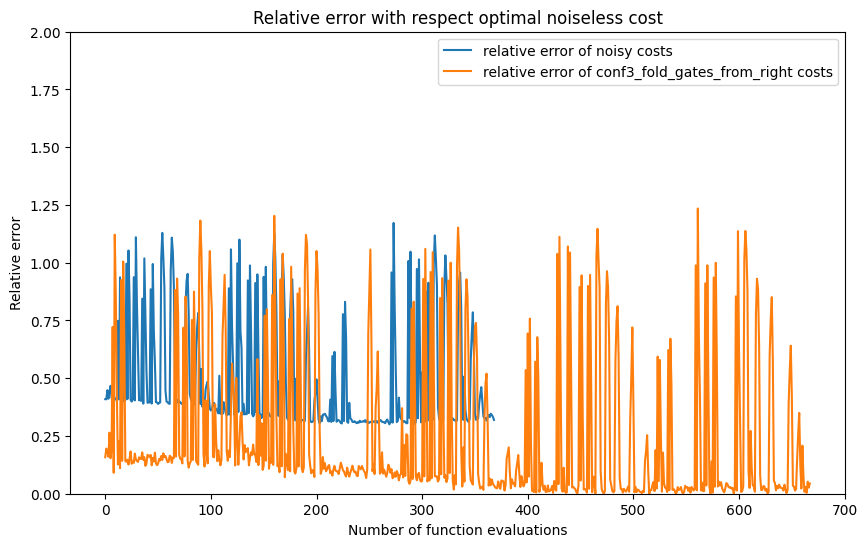

In [6]:
noisy_relative_errors = []
zne_relative_errors = {}
optimal_noiseless_cost = results[0][noiseless_key].optimized['cost']

#calculate the relative errors between the noisy costs and the noiseless costs
for noisy_itr,noisy_cost in enumerate(results[1][noisy_key].intermediate['cost']):
    rel_err = abs(noisy_cost - optimal_noiseless_cost) / abs(optimal_noiseless_cost)
    noisy_relative_errors.append(rel_err)

#calculate the relative errors between the zne costs and the noiseless costs
for zne_key_itr,zne_key in enumerate(zne_keys):
    zne_relative_errors[zne_key] = []
    for zne_cost_itr,zne_cost in enumerate(results[2][zne_key].intermediate['cost']):
        rel_err = abs(zne_cost - optimal_noiseless_cost) / abs(optimal_noiseless_cost)
        zne_relative_errors[zne_key].append(rel_err)

#draw the plots
noisy_X = range(len(noisy_relative_errors))
for zne_key in zne_keys:
    zne_label = zne_key[zne_key.find("conf"):]
    zne_X = range(len(zne_relative_errors[zne_key]))
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(noisy_X, noisy_relative_errors, label='relative error of noisy costs')
    ax.plot(zne_X, zne_relative_errors[zne_key], label='relative error of '+zne_label+' costs')

    plt.ylim(0,2)
    plt.xlabel('Number of function evaluations')
    plt.ylabel('Relative error')
    plt.title('Relative error with respect optimal noiseless cost')
    plt.legend()
    plt.savefig("./imgs/relative_errors_comparison/optimal_noiseless_cost/prob4_relativeErrorsComparison_%s.png" % (str(zne_label)))

## Approximation ratio to optimal cost

The ideal cost is the cost that minimal cost that could be find through the QAOA Hamiltonian. This is could different to the optimal noiseless cost. If we give a bad configuration to a QAOA execution (low P, a bad optimizer...), even the noiseless optimal cost could be different to the real and ideal cost of the hamiltonian.

The approximatio ratio of each execution (the noiseless,noisy and the ZNE ones) to the ideal cost will be calculated. The approximation ratio here will be defined as


$
1 - relative\_error = 1 - \tfrac{|f(x) - \max_x f(x)|}{|\max_x f(x)|}
$



In [7]:
def approximation_ratio(function_cost,optimal_cost):
    ratio = 1- abs(function_cost - optimal_cost) / abs(optimal_cost)
    if ratio < 0: 
        ratio=0.0
    return ratio
approximation_ratio(-4.2,-4)

0.95

C:\Users\Adriano\AppData\Local\Temp\ipykernel_15436\3234786326.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=45, ha='right')


[Text(0, 0, 'noiseless'),
 Text(1, 0, 'noisy'),
 Text(2, 0, 'conf0_fold_gates_from_left'),
 Text(3, 0, 'conf0_fold_gates_from_right'),
 Text(4, 0, 'conf1_fold_gates_from_left'),
 Text(5, 0, 'conf1_fold_gates_from_right'),
 Text(6, 0, 'conf2_fold_gates_from_left'),
 Text(7, 0, 'conf2_fold_gates_from_right'),
 Text(8, 0, 'conf3_fold_gates_from_left'),
 Text(9, 0, 'conf3_fold_gates_from_right')]

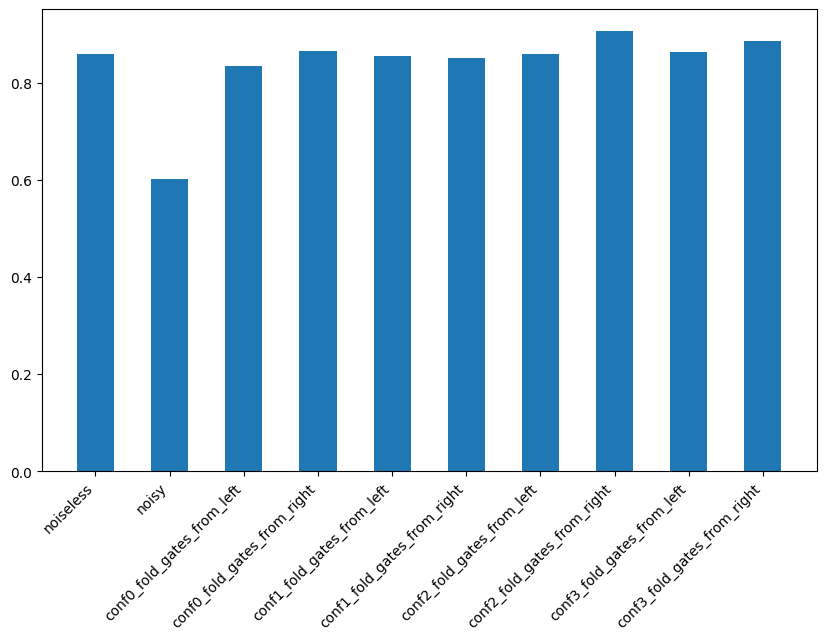

In [8]:
optimal_cost = -12 # took from maxcit_qaoa_zne notebook
noiseless_cost = results[0][noiseless_key].optimized['cost']
noisy_cost = results[1][noisy_key].optimized['cost']

noiseless_aprox = approximation_ratio(noiseless_cost,optimal_cost)
noisy_aprox = approximation_ratio(noisy_cost,optimal_cost)
zne_aproxs = {}

noiseless_fev = results[0][noiseless_key].optimized['eval_number']
noisy_fev = results[1][noisy_key].optimized['eval_number']
zne_fevs = {}

for zne_key in zne_keys:   
    zne_aproxs[zne_key] = approximation_ratio(results[2][zne_key].optimized['cost'],optimal_cost)
    zne_fevs[zne_key] = results[2][zne_key].optimized['eval_number']

categories = ['noiseless','noisy']
aproxs = [noiseless_aprox,noisy_aprox]
fevs = [noiseless_fev,noisy_fev]
for zne_key in zne_keys:   
    zne_label = zne_key[zne_key.find("conf"):]
    categories.append(zne_label)
    aproxs.append(zne_aproxs[zne_key])
    fevs.append(zne_fevs[zne_key])

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categories, aproxs,width=0.5)
ax.set_xticklabels(categories, rotation=45, ha='right')
